In [41]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from eli5.sklearn import PermutationImportance
import eli5
import matplotlib.pyplot as plt
from pdpbox import pdp, get_dataset, info_plots 
pd.set_option('display.max_columns', 30)

In [6]:
data = pd.read_csv("FIFA_2018_Statistics.csv")
data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [24]:
data.shape

(128, 27)

In [13]:
# convert the string "Yes/No" to binary
y = (data["Man of the Match"] == "Yes")

# Seperate numerical features
numerical_feature = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[numerical_feature]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify = y)

In [26]:
dt = DecisionTreeClassifier(random_state = 0, max_depth = 5, min_samples_split = 5)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

In [33]:
print("Confusion Matrix for Decision Tree Classifier")
cm_dt = confusion_matrix(y_test, y_pred_dt) 
print(cm_dt)

tn, fp, fn, tp = cm_dt.ravel()
print("True Positive: ", tp)
print("True Negative: ", tn)
print("False Positive: ", fp)
print("False Negative: ", fn)

print("Accuracy :", accuracy_score(y_test, y_pred_dt))

Confusion Matrix for Decision Tree Classifier
[[11  5]
 [ 4 12]]
True Positive:  12
True Negative:  11
False Positive:  5
False Negative:  4
Accuracy : 0.71875


### Random Forest

In [29]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 0)
rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)

print("Confusion Matrix for Random Forest Classifier")
print(confusion_matrix(y_test, y_pred_rfc))
print("Accuracy :", accuracy_score(y_test, y_pred_rfc))

Confusion Matrix for Random Forest Classifier
[[10  6]
 [ 1 15]]
Accuracy : 0.78125


In [38]:
# Extracting the most important features
perm = PermutationImportance(rfc, random_state = 0).fit(X_train, y_train)

eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1667 ± 0.0757,Goal Scored
0.0167 ± 0.0102,Off-Target
0.0083 ± 0.0156,Attempts
0.0042 ± 0.0102,Free Kicks
0.0021 ± 0.0083,Distance Covered (Kms)
0.0021 ± 0.0083,On-Target
0 ± 0.0000,Fouls Committed
0 ± 0.0000,Passes
0 ± 0.0000,Pass Accuracy %
0 ± 0.0000,Saves


The weights signifies how much the accuracy of model has changed by reshuffling the values of specific parameters. 
It measures how the performance (accuracy) varied from one-reshuffling to the next.

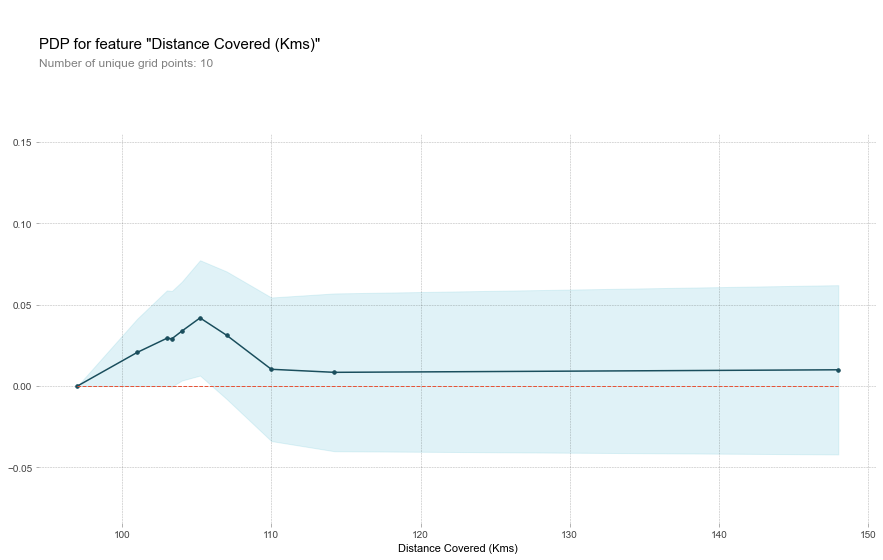

In [46]:
# Getting Insight into influence of the values for the most important features
feature_to_plot = "Distance Covered (Kms)"

pdp_dist = pdp.pdp_isolate(model = rfc, dataset = X_test,
                          model_features = numerical_feature,
                          feature = feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

Players may have to run an average distance of of 102 km to create an impact on the prediction of the model. if a player run more than 115 km, it is highly unlikely that they influence prediction of model.

Partial dependence plots give an insight about the threshold values of the feature, which are significantly impacting the prediction model.